In [1]:
from datum import *
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

%matplotlib inline 
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
data = Datum()
data.data_prepare()

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe6 in position 0: ordinal not in range(128)

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


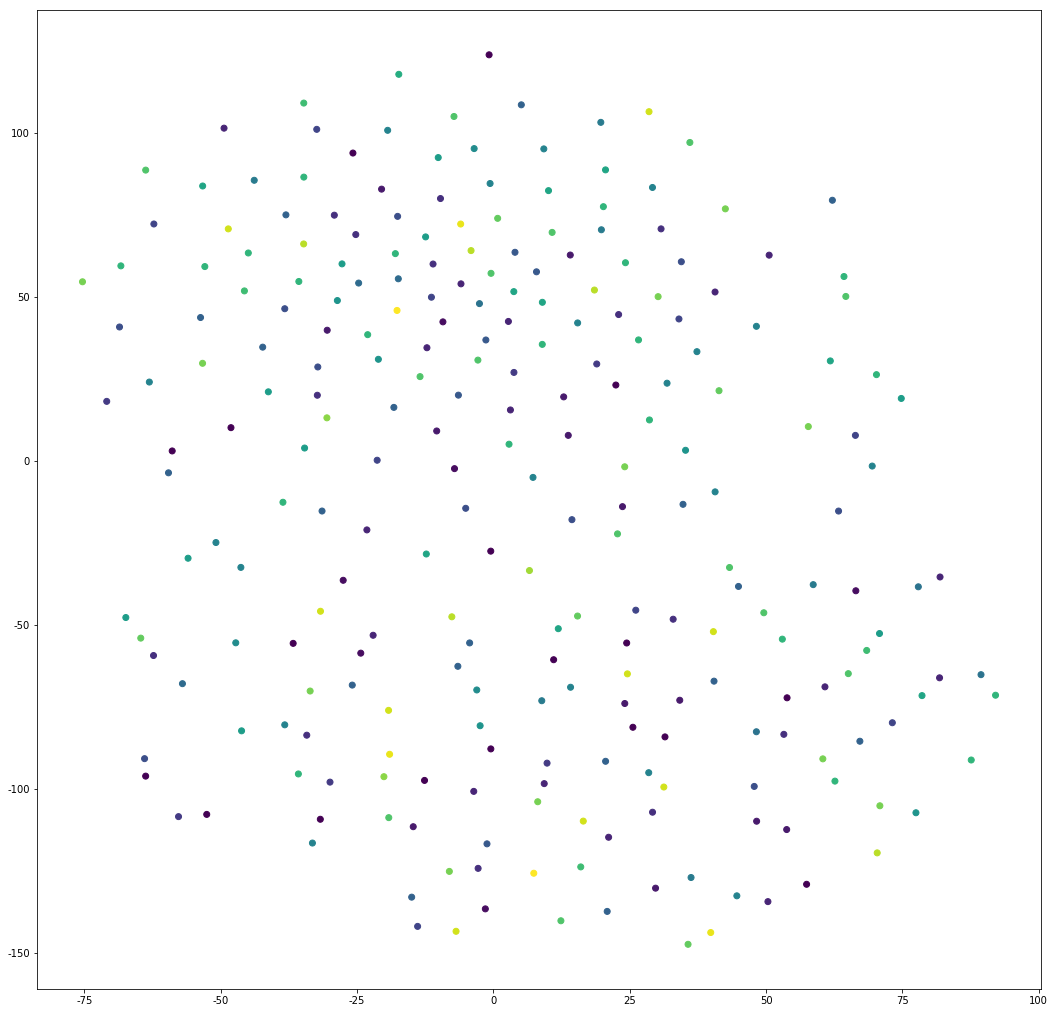

In [8]:
for num in range(44):
    embedding = np.load('data/embedding/embnedding_{}.npy'.format(num))
    tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=10000, method='exact', learning_rate=800)
    useful_index = []
    for i, weight in enumerate(data.weight_matrix[num]):
        try:
            stock_code = int(data.list_stocks[i].split('.')[0])
        except:
            continue
        if np.any(weight) and stock_code in data.dict_code2name:
            useful_index.append(i)
    low_dim_embs = tsne.fit_transform(embedding[useful_index, :])
    labels = []
    sectors = []
    colors = []
    for i in useful_index:
        secName = data.dict_code2name[int(data.list_stocks[i].split('.')[0])].split(';')[-2]
        sector = secName.split('-')[0]
        if not sector in sectors:
            sectors.append(sector)
        colors.append(sectors.index(sector)+1)
        labels.append(secName)
    plt.close('all')
    plot_with_labels(low_dim_embs, labels, colors, 'data/pic/tsne_{}.png'.format(num))

In [7]:
def plot_with_labels(low_dim_embs, labels, colors, filename):
    assert low_dim_embs.shape[0] >= len(labels), 'More labels than embeddings'
    plt.figure(figsize=(18, 18))  # in inches
    x, y = low_dim_embs[:, 0], low_dim_embs[:, 1]
    plt.scatter(x, y, c=colors)
    for i, label in enumerate(labels):
        plt.annotate(label,
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

    plt.savefig(filename)

'T00018.SH'